## Importing necessary libraries

In [231]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [232]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
#reading the data
df= pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [234]:
# Convert exports, imports and health spending percentages to absolute values
df['exports']= df['exports']*df['gdpp']/100
df['imports']= df['imports']*df['gdpp']/100
df['health']= df['health']*df['gdpp']/100

In [235]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [236]:
#shape of the data
df.shape

(167, 10)

In [237]:
#checking the each column data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [238]:
#checking for null values
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [239]:
df.set_index('country',inplace = True)

# outlier treatment

In [240]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [241]:
#checking for outliers
df.describe(percentiles= [0.25,0.5,0.75, 0.90,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


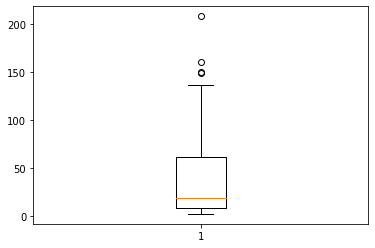

In [242]:
# boxplot for child_mort
plt.boxplot(df['child_mort'])
plt.show()

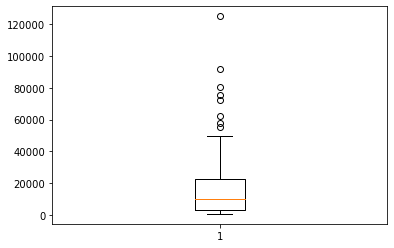

In [243]:
# boxplot for income

plt.boxplot(df['income'])
plt.show()

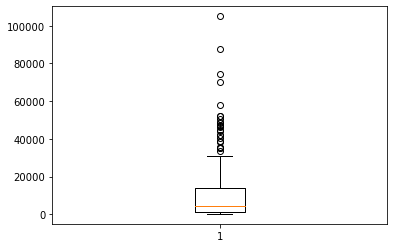

In [244]:
# boxplot for gdpp

plt.boxplot(df['gdpp'])
plt.show()

In [245]:
# removing (statistical) outliers
Q1= df.gdpp.quantile(0.05)
Q3= df.gdpp.quantile(0.95)

df = df[(df.gdpp <= Q3)]

Q1= df.child_mort.quantile(0.05)
Q3= df.child_mort.quantile(0.95)

df = df[(df.child_mort <= Q3)]

Q1= df.income.quantile(0.05)
Q3= df.income.quantile(0.95)

df = df[(df.income <= Q3)]


In [246]:
# shape of the data after outlier treatment
df.shape

(142, 9)

In [247]:
df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200
Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300
Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220
Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840
Bahamas,13.8,9800.00,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000
Bahrain,8.6,14386.50,1028.7900,10536.300,41100,7.440,76.0,2.16,20700


In [248]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,35.938732,3896.641870,723.695675,3982.049170,12824.584507,7.324528,70.421127,2.907394,8927.422535
std,32.797887,5709.660101,1144.541889,5474.450438,11178.907848,7.582535,7.870376,1.419231,11351.745939
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,46.500000,1.230000,231.000000
25%,10.300000,443.670000,77.714250,682.255000,3347.500000,1.887500,65.425000,1.772500,1320.000000
50%,20.900000,1577.940000,273.188000,1823.400000,9790.000000,5.415000,71.850000,2.475000,4480.000000
75%,58.175000,5051.637500,732.040000,5064.575000,18600.000000,10.075000,76.375000,3.847500,11100.000000
max,116.000000,33921.600000,5356.200000,33166.800000,41100.000000,45.900000,82.800000,6.540000,47400.000000


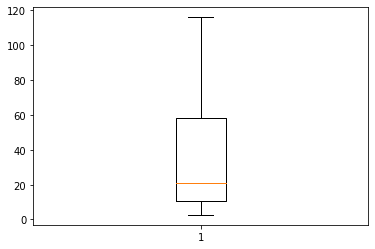

In [249]:
# boxplot for child_mort after outlier treatment

plt.boxplot(df['child_mort'])
plt.show()

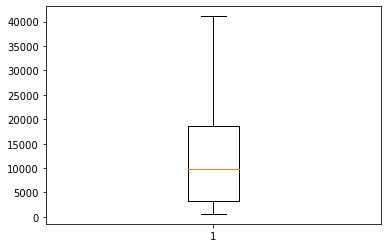

In [250]:
# boxplot for income after outlier treatment

plt.boxplot(df['income'])
plt.show()

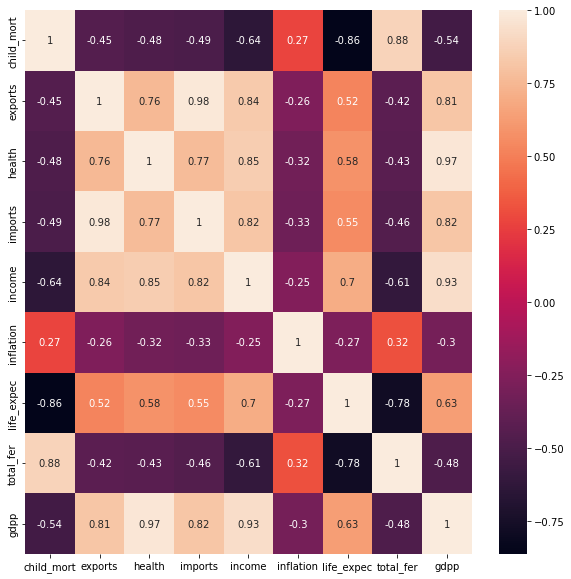

In [251]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot= True)
plt.show()

## Dist plot

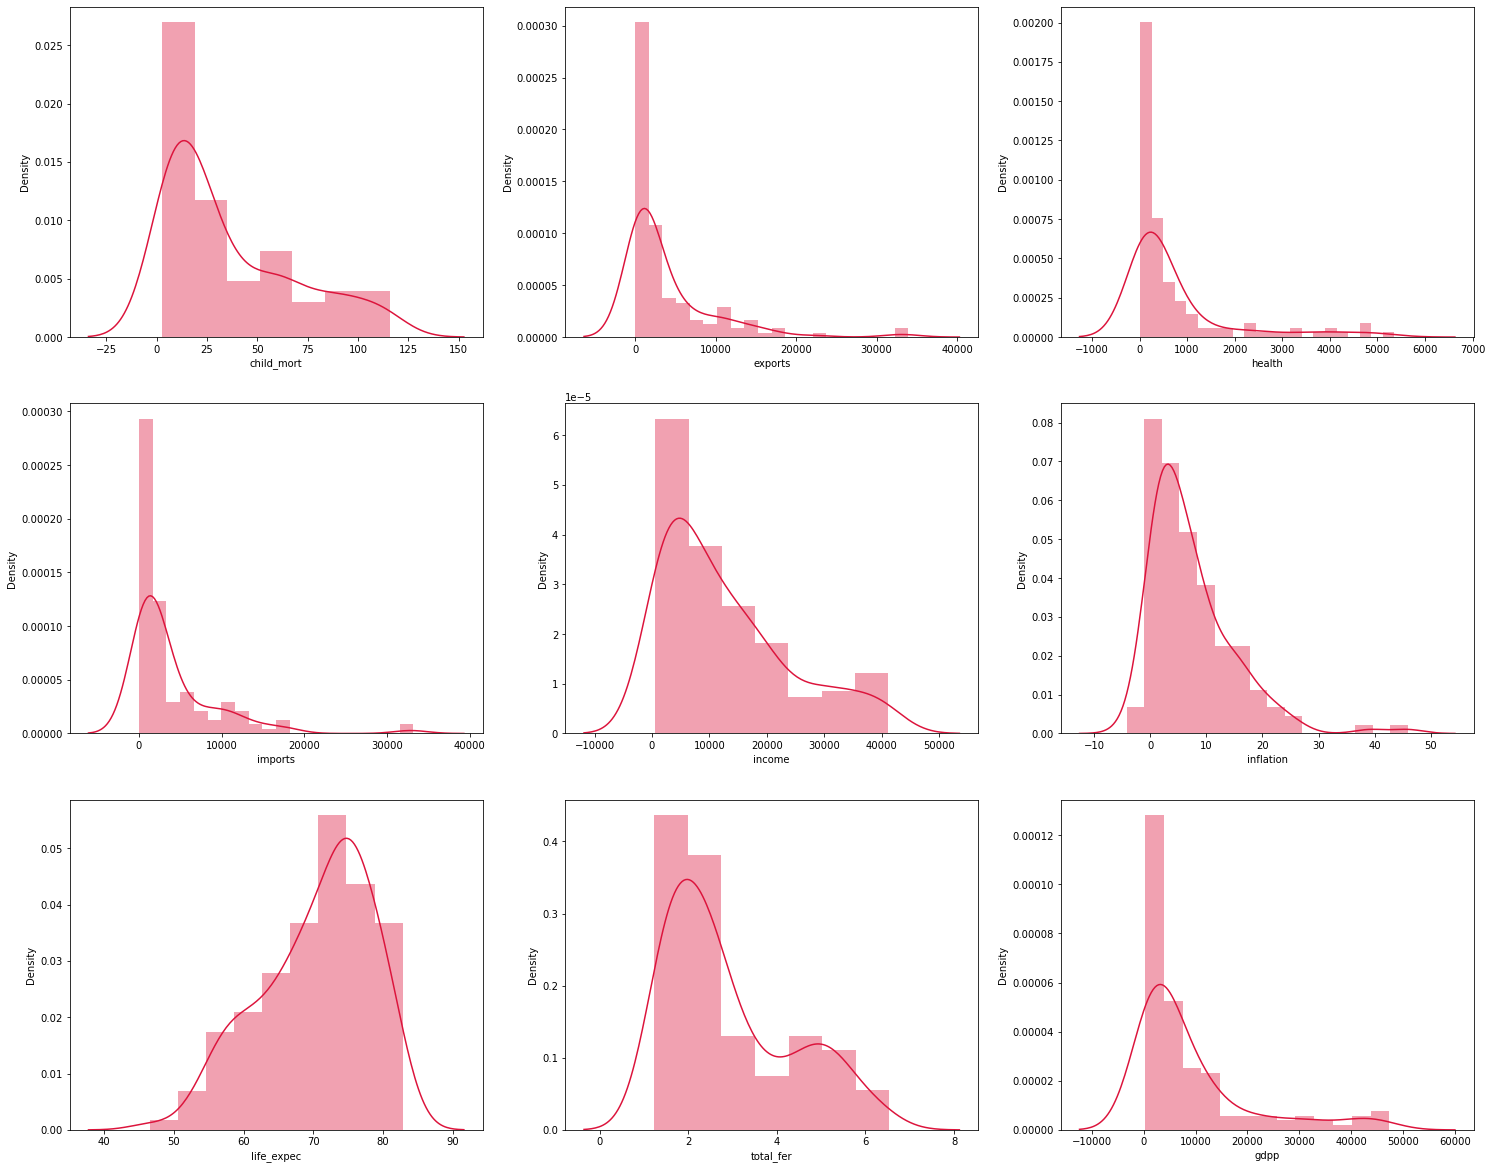

In [252]:
plt.figure(figsize = (20,16))
feature = df.columns[:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]], color='crimson')
    plt.subplots_adjust(right=1.1)
    plt.subplots_adjust(top=1.1)
    
### By looking at the plots we can see that, Child Mortality, Income and GDP are the three columns that have a variation in the data.
### Hence we can consider these three columns for cluster profiling

# Check the cluster tendancy: Hopkin's Test

In [253]:

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [254]:
### We can see that the value is between {0.8, ..., 0.99}, so the dataset has a high tendency to cluster.

hopkins(df)

0.8904664256395028

 # Scaling

In [255]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled= scaler.fit_transform(df)
df_scaled

array([[ 1.66026986, -0.67516096, -0.59778647, ..., -1.81331461,
         2.05950602, -0.74033251],
       [-0.59172069, -0.48359823, -0.39964822, ...,  0.74960634,
        -0.88910467, -0.42764754],
       [-0.26432532, -0.38386398, -0.47146994, ...,  0.77510804,
        -0.01229957, -0.39493806],
       ...,
       [-0.38671611, -0.5191021 , -0.55597463, ...,  0.34157912,
        -0.6769744 , -0.67341068],
       [ 0.62300791, -0.61580622, -0.57504163, ..., -0.37246851,
         1.24634   , -0.67341068],
       [ 1.44302621, -0.58993409, -0.5591399 , ..., -2.34885034,
         1.76252365, -0.66015008]])

In [256]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [257]:

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.660270,-0.675161,-0.597786,-0.684447,-1.006743,0.279980,-1.813315,2.059506,-0.740333
1,-0.591721,-0.483598,-0.399648,-0.365583,-0.259849,-0.375147,0.749606,-0.889105,-0.427648
2,-0.264325,-0.383864,-0.471470,-0.473243,0.006770,1.161424,0.775108,-0.012300,-0.394938
3,-0.784486,0.290773,0.010490,0.587290,0.563349,-0.778811,0.813361,-0.549696,0.289309
4,-0.655976,-0.342725,0.096978,-0.427862,0.527441,1.796698,0.685852,-0.379992,0.121341


#  Modelling

In [258]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

## Finding the Optimal Number of Clusters

### ELBOW CURVE

In [259]:
# ssd =[]
# range_n_clusters=[2,3,4,5,6,7,8,9]
# for num_clusters in range_n_clusters:
#     kmeans = KMeans(n_clusters = num_clusters,max_iter = 50)
#     kmeans.fit(df_scaled)
#     ssd.append(kmeans.inertia_)
# plt.plot(ssd) 

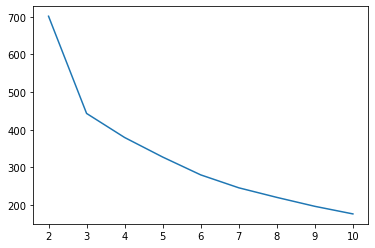

In [260]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

# silhouette analysis

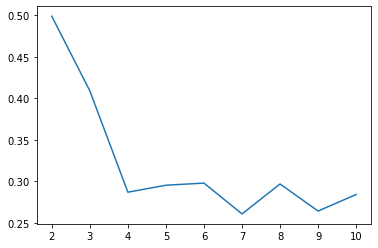

In [261]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_scaled)
    ss.append([k, silhouette_score(df_scaled, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

plt.show()

### From the plot of silhouette score above, We can see that we have the maximum at 2, and next maximum is at 3. So we can go with 3.

In [262]:
# # silhouette analysis
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9]

# for num_clusters in range_n_clusters:
    
#     # intialise kmeans
#     kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
#     kmeans.fit(df_scaled)
    
#     cluster_labels = kmeans.labels_
#  # silhouette score
#     silhouette_avg = silhouette_score(df_scaled, cluster_labels)
#     print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
        

## using the final k , perform final k means clustering

In [263]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [264]:
kmeans.labels_

array([2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1,
       1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 2, 2])

In [265]:
df['cluster id']= kmeans.labels_

In [266]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0
Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,0


In [267]:
df['cluster id'].value_counts()

0    79
2    41
1    22
Name: cluster id, dtype: int64

## visualising the clusters using boxplots

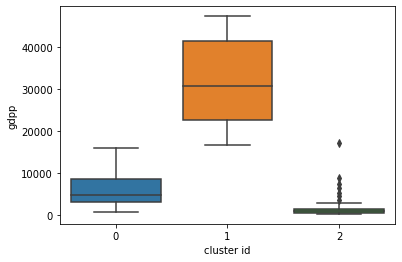

In [268]:
sns.boxplot(x= 'cluster id' , y= 'gdpp', data=df)
plt.show()

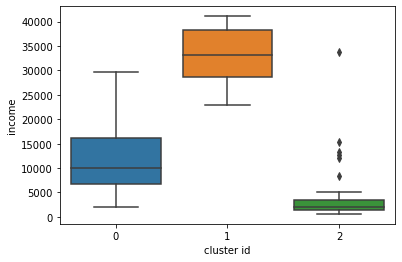

In [269]:
sns.boxplot(x= 'cluster id' , y= 'income', data=df)
plt.show()

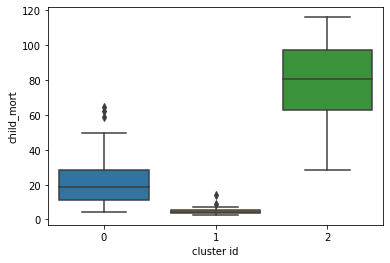

In [270]:
sns.boxplot(x= 'cluster id' , y= 'child_mort', data=df)
plt.show()

## Perform cluster profiling : gdpp , income, child-mort

 #### our aim is to find the countries which as low gdpp, low income,high child_mort 
 ####   by seeing the box plots clusters 2 has low gdpp, low income,high child_mort .

In [271]:
cluster_km=df[df['cluster id']==1]
cluster_km.sort_values(['gdpp','income','child_mort'],
                      ascending=[True,True,False]).head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id
country,,,,,,,,,,
Slovak Republic,7.0,12665.8,1459.14,12914.8,25200,0.485,75.5,1.43,16600,1
Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800,1
Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700,1
Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100,1
South Korea,4.1,10917.4,1531.53,10210.2,30400,3.160,80.1,1.23,22100,1


### countries that are direst need belongs to cluster 2 are in direst need of aid from the analysis
 ###### Barundi
 ###### Liberia
 ###### Congo, Dem. Rep.
 ###### Madagascar
######  Mozambique


## Hierarchical Clustering

In [272]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.660270,-0.675161,-0.597786,-0.684447,-1.006743,0.279980,-1.813315,2.059506,-0.740333
1,-0.591721,-0.483598,-0.399648,-0.365583,-0.259849,-0.375147,0.749606,-0.889105,-0.427648
2,-0.264325,-0.383864,-0.471470,-0.473243,0.006770,1.161424,0.775108,-0.012300,-0.394938
3,-0.784486,0.290773,0.010490,0.587290,0.563349,-0.778811,0.813361,-0.549696,0.289309
4,-0.655976,-0.342725,0.096978,-0.427862,0.527441,1.796698,0.685852,-0.379992,0.121341


In [273]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0
Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,0


In [274]:
# importing libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

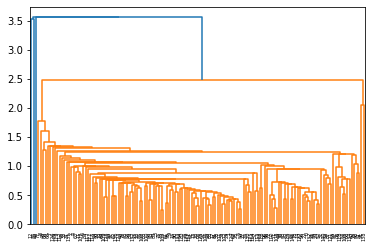

In [275]:
# single linkage
mergings= linkage(df_scaled, method= 'single' , metric= 'euclidean')
dendrogram(mergings)
plt.show()

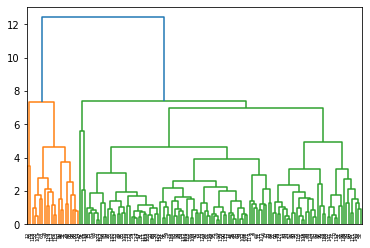

In [276]:
# complete linkage
mergings= linkage(df_scaled, method= 'complete' , metric= 'euclidean')
dendrogram(mergings)
plt.show()

In [277]:
cluster_labels = cut_tree(mergings , n_clusters = 3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 0])

In [278]:
df['cluster_labels']=cluster_labels
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0
Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,0,0


### visualizing using boxplots

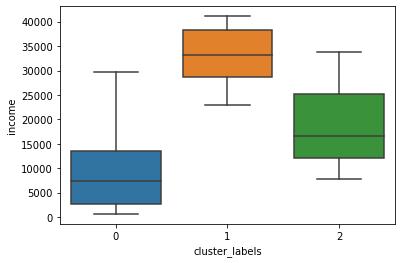

In [279]:
# box plt for income vs cluster_labels
sns.boxplot(x= 'cluster_labels', y='income' , data =df)
plt.show()

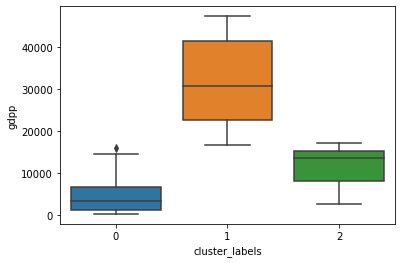

In [280]:
# box plt for gdpp vs cluster_labels
sns.boxplot(x= 'cluster_labels', y='gdpp' , data =df)
plt.show()

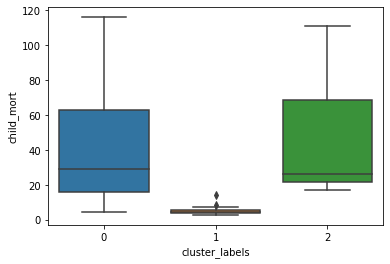

In [281]:
# box plt for child_mort vs cluster_labels

sns.boxplot(x= 'cluster_labels', y='child_mort' , data =df)
plt.show()

## cluster profiling

### #According to the problem country which is in direst need can be identified as low income,low gdpp, high child_mort
#### so in Hierarchical Clustering cluster 0 has the countries with following


In [282]:
cluster_hc=df[df['cluster_labels']==0]
cluster_hc.sort_values(['gdpp','income','child_mort'],
                      ascending=[True,True,False]).head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id,cluster_labels
country,,,,,,,,,,,
Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2,0
Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2,0
"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2,0
Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,2,0
Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2,0


### following countries are in direst need of aid
##### 1.Burundi
##### 2.Liberia
##### 3.Congo, Dem. Rep.
##### 4.Madagascar
##### 5.Mozambique

### Cluster 1 in K-means is the better cluster we got with High child mortality, low income, and low GDP. So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.

### Final list of the 5 countries we got are:

### 1.Burundi
### 2.Liberia
### 3.Congo, Dem. Rep.
### 4.Madagascar
### 5.Mozambique
